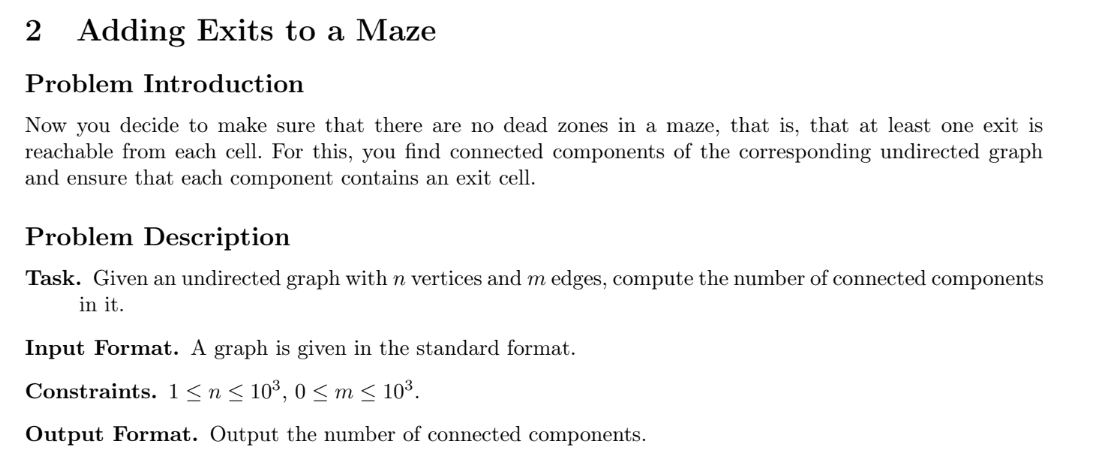

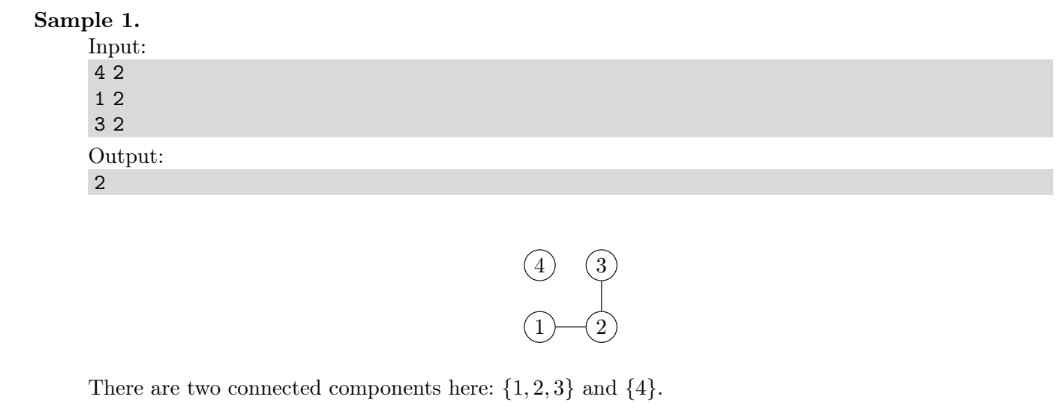

I tried some different algorithms and i got some solutions to work, but the biggest challenge for me was to efficiently search through the vertices. I didn't knew how to think about building an adjency list and the depth-first-search.

In [1]:
def number_of_connected_components(vertices, m,visited_nodes=None):

    

    adj_list = {i: [] for i in range(1, m+1)}

    for vertex, neighbors in vertices.items():
        if vertex not in adj_list:
            adj_list[vertex] = []
        for neighbor in neighbors:
            if neighbor not in adj_list:
                adj_list[neighbor] = []
            if neighbor not in adj_list[vertex]:
                adj_list[vertex].append(neighbor)
            if vertex not in adj_list[neighbor]:
                adj_list[neighbor].append(vertex)
    
    visited = set()

    def dfs(node):

        visited.add(node)
        for neighbor in adj_list[node]:
            if neighbor not in visited:
                dfs(neighbor)

    num_components = 0
    for vertex in range(1, m+1):
        if vertex not in visited:
            dfs(vertex)
            num_componets += 1

    return num_components
   

In [50]:
number_of_connected_components(vertices=vertices, m=m)

5

## Corrected Algorithm Using DFS

The issue with the original algorithm is that it doesn't properly explore connected components. Here's a correct implementation using Depth-First Search (DFS):

In [4]:
def number_of_connected_components_correct(vertices, m):
    """
    Find the number of connected components in a graph.
    
    Args:
        vertices: Dictionary where keys are vertices and values are lists of adjacent vertices
        m: Total number of vertices (nodes) in the graph
    
    Returns:
        Number of connected components
    """
    # Create adjacency list that includes all vertices (even isolated ones)
    adj_list = {i: [] for i in range(1, m + 1)}
    
    # Add edges from the input
    for vertex, neighbors in vertices.items():
        if vertex not in adj_list:
            adj_list[vertex] = []
        for neighbor in neighbors:
            if neighbor not in adj_list:
                adj_list[neighbor] = []
            # Add bidirectional edges
            if neighbor not in adj_list[vertex]:
                adj_list[vertex].append(neighbor)
            if vertex not in adj_list[neighbor]:
                adj_list[neighbor].append(vertex)
    
    visited = set()
    
    def dfs(node):
        """Explore all nodes in the current connected component"""
        visited.add(node)
        for neighbor in adj_list[node]:
            if neighbor not in visited:
                dfs(neighbor)
    
    # Count connected components
    num_components = 0
    for vertex in range(1, m + 1):
        if vertex not in visited:
            dfs(vertex)
            num_components += 1
    
    return num_components

## Test Cases

Let's test both algorithms with the example you provided:
- 4 nodes
- 2 edges: (1, 2) and (3, 2)
- Expected output: 2 connected components
  - Component 1: {1, 2, 3}
  - Component 2: {4} (isolated node)

In [44]:
# Test Case 1: Your example
# 4 nodes, 2 edges: (1,2) and (3,2)
# Expected: 2 components - {1,2,3} and {4}

vertices_test1 = {1: [2], 3: [2]}
m_test1 = 4
n_test1 = 2

print("=" * 50)
print("Test Case 1: 4 nodes, 2 edges (1-2, 3-2)")
print("=" * 50)
print(f"Input: {vertices_test1}")
print(f"Total nodes: {m_test1}")
print(f"Expected output: 2 (components: {{1,2,3}}, {{4}})")
print()

# Test original algorithm
result_original = number_of_connected_components(vertices_test1, m_test1)
print(f"Original algorithm result: {result_original}")

# Test corrected algorithm
result_correct = number_of_connected_components_correct(vertices_test1, m_test1)
print(f"Corrected algorithm result: {result_correct}")
print()

Test Case 1: 4 nodes, 2 edges (1-2, 3-2)
Input: {1: [2], 3: [2]}
Total nodes: 4
Expected output: 2 (components: {1,2,3}, {4})

Original algorithm result: 2
Corrected algorithm result: 2



In [51]:
# Test Case 2: All nodes isolated
# 5 nodes, 0 edges
# Expected: 5 components

vertices_test2 = {}
m_test2 = 5

print("=" * 50)
print("Test Case 2: 5 isolated nodes, no edges")
print("=" * 50)
print(f"Input: {vertices_test2}")
print(f"Total nodes: {m_test2}")
print(f"Expected output: 5 (all isolated)")
print()

result_correct = number_of_connected_components(vertices_test2, m_test2)
result_correct2 = number_of_connected_components_correct(vertices_test2, m_test2)
print(f'Original algorithm result: {result_correct}')
print(f"Corrected algorithm result: {result_correct2}")
print()

Test Case 2: 5 isolated nodes, no edges
Input: {}
Total nodes: 5
Expected output: 5 (all isolated)

Original algorithm result: 5
Corrected algorithm result: 5



In [53]:
# Test Case 3: All nodes connected
# 5 nodes forming a chain: 1-2-3-4-5
# Expected: 1 component

vertices_test3 = {1: [2], 2: [3], 3: [4], 4: [5]}
m_test3 = 5

print("=" * 50)
print("Test Case 3: 5 nodes in a chain (1-2-3-4-5)")
print("=" * 50)
print(f"Input: {vertices_test3}")
print(f"Total nodes: {m_test3}")
print(f"Expected output: 1 (all connected)")
print()

result_correct = number_of_connected_components(vertices_test3, m_test3)
result_correct3 = number_of_connected_components_correct(vertices_test3, m_test3)
print(f'Original algorithm result: {result_correct}')
print(f"Corrected algorithm result: {result_correct3}")
print()

Test Case 3: 5 nodes in a chain (1-2-3-4-5)
Input: {1: [2], 2: [3], 3: [4], 4: [5]}
Total nodes: 5
Expected output: 1 (all connected)

Original algorithm result: 4
Corrected algorithm result: 1



In [ ]:
# Test Case 4: Multiple components
# 6 nodes: {1,2}, {3,4}, {5,6}
# Expected: 3 components

vertices_test4 = {1: [2], 3: [4], 5: [6]}
m_test4 = 6

print("=" * 50)
print("Test Case 4: 6 nodes in 3 pairs")
print("=" * 50)
print(f"Input: {vertices_test4}")
print(f"Total nodes: {m_test4}")
print(f"Expected output: 3 (components: {{1,2}}, {{3,4}}, {{5,6}})")
print()

result_correct4 = number_of_connected_components_correct(vertices_test4, m_test4)
print(f"Corrected algorithm result: {result_correct4}")
print()

In [6]:
# Test Case 5: Complex graph with cycle
# 7 nodes: {1,2,3,4} form a cycle, {5,6} connected, {7} isolated
# Expected: 3 components

vertices_test5 = {1: [2, 4], 2: [3], 3: [4], 5: [6]}
m_test5 = 7

print("=" * 50)
print("Test Case 5: Complex graph with cycle")
print("=" * 50)
print(f"Input: {vertices_test5}")
print(f"Total nodes: {m_test5}")
print(f"Expected output: 3 (components: {{1,2,3,4}}, {{5,6}}, {{7}})")
print()

result_original = number_of_connected_components(vertices_test5, m_test5)
result_correct5 = number_of_connected_components_correct(vertices_test5, m_test5)
print(f"Corrected algorithm result: {result_correct5}")
print(f'Original algorithm result: {result_original}')

Test Case 5: Complex graph with cycle
Input: {1: [2, 4], 2: [3], 3: [4], 5: [6]}
Total nodes: 7
Expected output: 3 (components: {1,2,3,4}, {5,6}, {7})



UnboundLocalError: cannot access local variable 'num_componets' where it is not associated with a value